In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

import seaborn as sns

In [2]:
palette = sns.color_palette('viridis', n_colors=8)
palette
# print(palette.as_hex())

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [3]:
palette_2 = sns.color_palette('rocket', n_colors=3)
palette_2
# print(palette_2.as_hex())

[(0.38092887, 0.12061482, 0.32506528),
 (0.7965014, 0.10506637, 0.31063031),
 (0.95922872, 0.53307513, 0.3748895)]

In [4]:
def modelLV(Y, t, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    X1, X2, X3 = Y
    
    dX1 = a0*X1 - a1*X1 - a2*X1*X2 + a3*X1*X3
    dX2 = a4*X1*X2 - a5*X2 - a6*X2*X3
    dX3 = -a7*X1*X3 + a8*X2*X3 - a9*X3
    
    return [dX1, dX2, dX3]

In [5]:
parNames=['$a_0$', '$a_1$', '$a_2$', '$a_3$', '$a_4$', '$a_5$', '$a_6$', '$a_7$', '$a_8$', '$a_9$', 'RMSE']

In [6]:
def simulations(dfParams, Y0, t):
    X1 = []
    X2 = []
    X3 = []
    
    for i in range(dfParams.shape[0]):
        a0 = dfParams['$a_0$'][i]
        a1 = dfParams['$a_1$'][i]
        a2 = dfParams['$a_2$'][i]
        a3 = dfParams['$a_3$'][i]
        a4 = dfParams['$a_4$'][i]
        a5 = dfParams['$a_5$'][i]
        a6 = dfParams['$a_6$'][i]
        a7 = dfParams['$a_7$'][i]
        a8 = dfParams['$a_8$'][i]
        a9 = dfParams['$a_9$'][i]
    
        sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))
        X1.append(sol[:,0])
        X2.append(sol[:,1])
        X3.append(sol[:,2])

    return [X1, X2, X3]

# Lotka-Volterra (Cycle model)

\begin{align}
\dot X_1 &= - a_1 X_1 - a_2 X_1 X_2 + a_3 X_1 X_3 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 - a_6 X_2 X_3 \\
\dot X_3 &= -a_7 X_1 X_3 + a_8 X_2 X_3 - a_9 X_3 \\
\end{align}

In [144]:
a0 = 0.0 # Reproduction rate of X1
a1 = 0.18 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.15 # Reproduction rate of X1 in presence of X3
a4 = 0.11 # Reproduction rate of X2 in presence of X1
a5 = 0.02 # Mortality rate of X2
a6 = 0.12 # Rate of predation of X3 on X2
a7 = 0.04 # Rate of predation of X1 on X3
a8 = 0.12 # Reproduction rate of X3 in presence of X2
a9 = 0.02 # Mortality rate of X3

In [145]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = parNames[:-1]

In [146]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.0,0.18,0.16,0.15,0.11,0.02,0.12,0.04,0.12,0.02


## Generating data

In [147]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [148]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [149]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [150]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

## Recovering parameters

In [151]:
dfParams_ground = dfGroundPars.drop(columns=['$a_0$']).melt(var_name='Parameters', value_name='Values')

In [152]:
dfData = pd.read_csv('cycle/oldBestPars/LVdata_noise.data', sep=' ')

### Quantitative X1

In [153]:
dfParams = pd.read_csv('cycle/oldBestPars/bestPars_quant.dat', sep=' ', names=parNames)

In [154]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [155]:
# Convert list of arrays to a 2D numpy array and compute median and confidence innterval
X1_2D = np.array(X1_I)
X2_2D = np.array(X2_I)
X3_2D = np.array(X3_I)

median_X1_I = np.median(X1_2D, axis=0)
confidence_X1_I = np.percentile(X1_2D, [2.5, 97.5], axis=0)

median_X2_I = np.median(X2_2D, axis=0)
confidence_X2_I = np.percentile(X2_2D, [2.5, 97.5], axis=0)

median_X3_I = np.median(X3_2D, axis=0)
confidence_X3_I = np.percentile(X3_2D, [2.5, 97.5], axis=0)

In [156]:
dfParams_quant = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [157]:
df_a1 = pd.read_csv('cycle/profilesData/oldWin/a1Profile.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/oldWin/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/oldWin/a3Profile.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/oldWin/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/oldWin/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/oldWin/a6Profile.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/oldWin/a7Profile.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/oldWin/a8Profile.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/oldWin/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [158]:
df_a1_quant = df_a1
df_a2_quant = df_a2
df_a3_quant = df_a3
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a6_quant = df_a6
df_a7_quant = df_a7
df_a8_quant = df_a8
df_a9_quant = df_a9

### Qualitative X2

In [159]:
dfQual_x2 = pd.read_csv('cycle/oldBestPars/LVdata_qual_x2.data', sep=' ')

In [160]:
dfParams = pd.read_csv('cycle/oldBestPars/bestPars_x2.dat', sep=' ', names=parNames)

In [161]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [162]:
# Convert list of arrays to a 2D numpy array and compute median and confidence innterval
X1_2D = np.array(X1_II)
X2_2D = np.array(X2_II)
X3_2D = np.array(X3_II)

median_X1_II = np.median(X1_2D, axis=0)
confidence_X1_II = np.percentile(X1_2D, [2.5, 97.5], axis=0)

median_X2_II = np.median(X2_2D, axis=0)
confidence_X2_II = np.percentile(X2_2D, [2.5, 97.5], axis=0)

median_X3_II = np.median(X3_2D, axis=0)
confidence_X3_II = np.percentile(X3_2D, [2.5, 97.5], axis=0)

In [163]:
dfParams_x2 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [164]:
df_a1 = pd.read_csv('cycle/profilesData/oldWin/a1Profile_x2.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/oldWin/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/oldWin/a3Profile_x2.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/oldWin/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/oldWin/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/oldWin/a6Profile_x2.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/oldWin/a7Profile_x2.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/oldWin/a8Profile_x2.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/oldWin/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [165]:
df_a1_x2 = df_a1
df_a2_x2 = df_a2
df_a3_x2 = df_a3
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a6_x2 = df_a6
df_a7_x2 = df_a7
df_a8_x2 = df_a8
df_a9_x2 = df_a9

### Qualitative X3

In [166]:
dfQual_x3 = pd.read_csv('cycle/oldBestPars/LVdata_qual_x3.data', sep=' ')

In [167]:
dfParams = pd.read_csv('cycle/oldBestPars/bestPars_x3.dat', sep=' ', names=parNames)

In [168]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [169]:
# Convert list of arrays to a 2D numpy array and compute median and confidence innterval
X1_2D = np.array(X1_III)
X2_2D = np.array(X2_III)
X3_2D = np.array(X3_III)

median_X1_III = np.median(X1_2D, axis=0)
confidence_X1_III = np.percentile(X1_2D, [2.5, 97.5], axis=0)

median_X2_III = np.median(X2_2D, axis=0)
confidence_X2_III = np.percentile(X2_2D, [2.5, 97.5], axis=0)

median_X3_III = np.median(X3_2D, axis=0)
confidence_X3_III = np.percentile(X3_2D, [2.5, 97.5], axis=0)

In [170]:
dfParams_x3 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [171]:
df_a1 = pd.read_csv('cycle/profilesData/oldWin/a1Profile_x3.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/oldWin/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/oldWin/a3Profile_x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/oldWin/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/oldWin/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/oldWin/a6Profile_x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/oldWin/a7Profile_x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/oldWin/a8Profile_x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/oldWin/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [172]:
df_a1_x3 = df_a1
df_a2_x3 = df_a2
df_a3_x3 = df_a3
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a6_x3 = df_a6
df_a7_x3 = df_a7
df_a8_x3 = df_a8
df_a9_x3 = df_a9

### Qualitative X2 and X3

In [173]:
dfParams = pd.read_csv('cycle/oldBestPars/bestPars_x2x3.dat', sep=' ', names=parNames)

In [174]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [175]:
# Convert list of arrays to a 2D numpy array and compute median and confidence innterval
X1_2D = np.array(X1_IV)
X2_2D = np.array(X2_IV)
X3_2D = np.array(X3_IV)

median_X1_IV = np.median(X1_2D, axis=0)
confidence_X1_IV = np.percentile(X1_2D, [2.5, 97.5], axis=0)

median_X2_IV = np.median(X2_2D, axis=0)
confidence_X2_IV = np.percentile(X2_2D, [2.5, 97.5], axis=0)

median_X3_IV = np.median(X3_2D, axis=0)
confidence_X3_IV = np.percentile(X3_2D, [2.5, 97.5], axis=0)

In [176]:
dfParams_x2x3 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [177]:
df_a1 = pd.read_csv('cycle/profilesData/oldWin/a1Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/oldWin/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/oldWin/a3Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/oldWin/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/oldWin/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/oldWin/a6Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/oldWin/a7Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/oldWin/a8Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/oldWin/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [178]:
df_a1_x2x3 = df_a1
df_a2_x2x3 = df_a2
df_a3_x2x3 = df_a3
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a6_x2x3 = df_a6
df_a7_x2x3 = df_a7
df_a8_x2x3 = df_a8
df_a9_x2x3 = df_a9

## Comparative

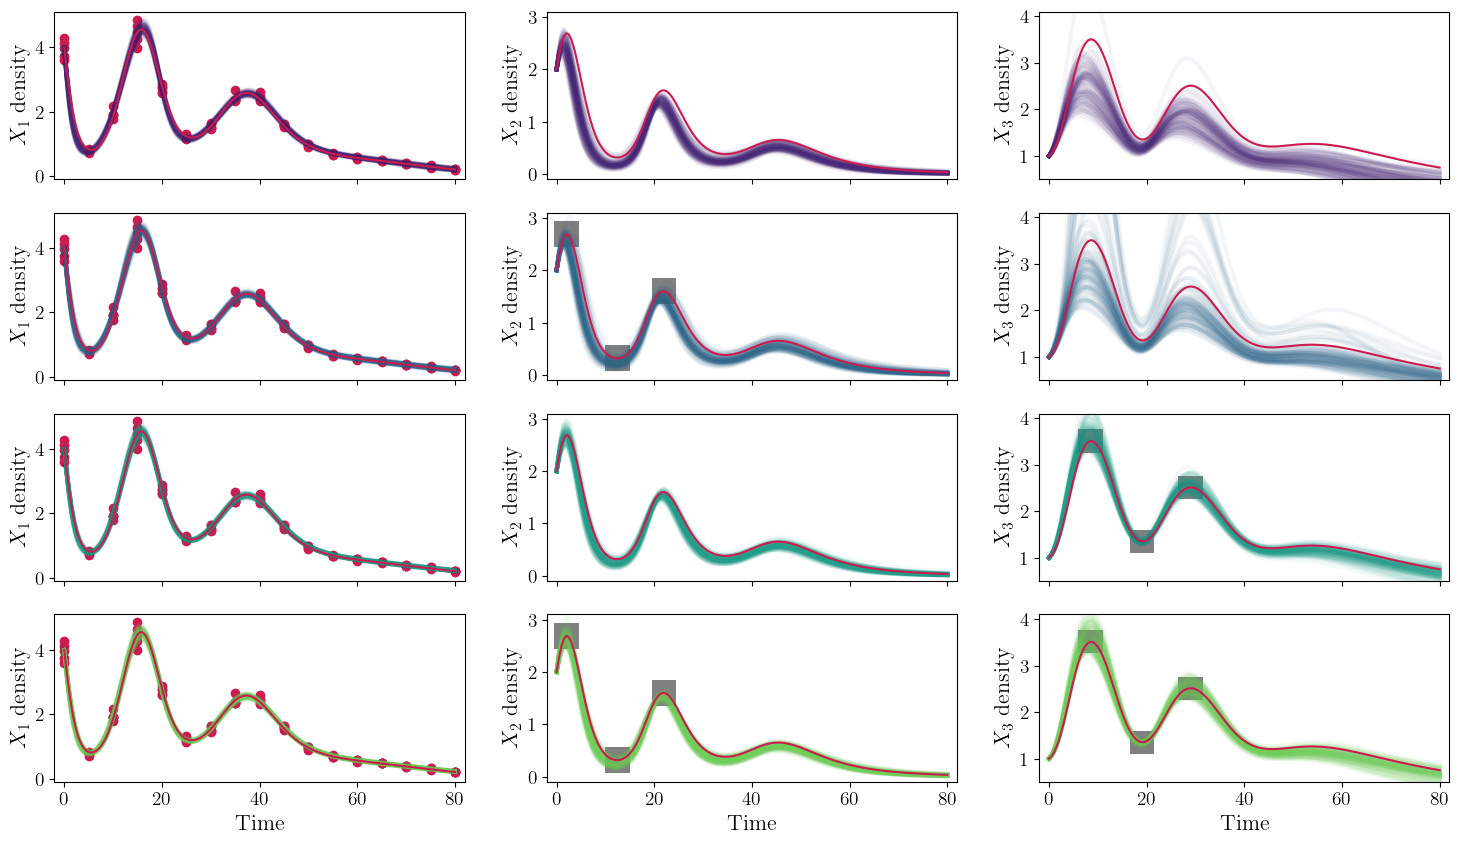

In [179]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,10), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

# axs[0,0].text(76, 4.2, r'\textbf{a}', fontsize=22)
# axs[0,1].text(76, 2.5, r'\textbf{b}', fontsize=22)
# axs[0,2].text(76, 3.5, r'\textbf{c}', fontsize=22)
# axs[1,0].text(76, 4.2, r'\textbf{d}', fontsize=22)
# axs[1,1].text(76, 2.5, r'\textbf{e}', fontsize=22)
# axs[1,2].text(76, 3.5, r'\textbf{f}', fontsize=22)
# axs[2,0].text(76, 4.2, r'\textbf{g}', fontsize=22)
# axs[2,1].text(76, 2.5, r'\textbf{h}', fontsize=22)
# axs[2,2].text(76, 3.5, r'\textbf{i}', fontsize=22)
# axs[3,0].text(76, 4.2, r'\textbf{j}', fontsize=22)
# axs[3,1].text(76, 2.5, r'\textbf{k}', fontsize=22)
# axs[3,2].text(76, 3.5, r'\textbf{l}', fontsize=22)

for i in range(4):
    axs[i,0].set_ylim((-0.1,5.1))
    axs[i,1].set_ylim((-0.1,3.1))
    axs[i,2].set_ylim((0.5,4.1))

plt.setp(axs, xlim=(-2,82))

# plt.savefig("cycleLV_graphs.svg", transparent=True)

plt.show()

In [180]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [181]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])
dfParams_all_cycle = dfParams_all.copy()

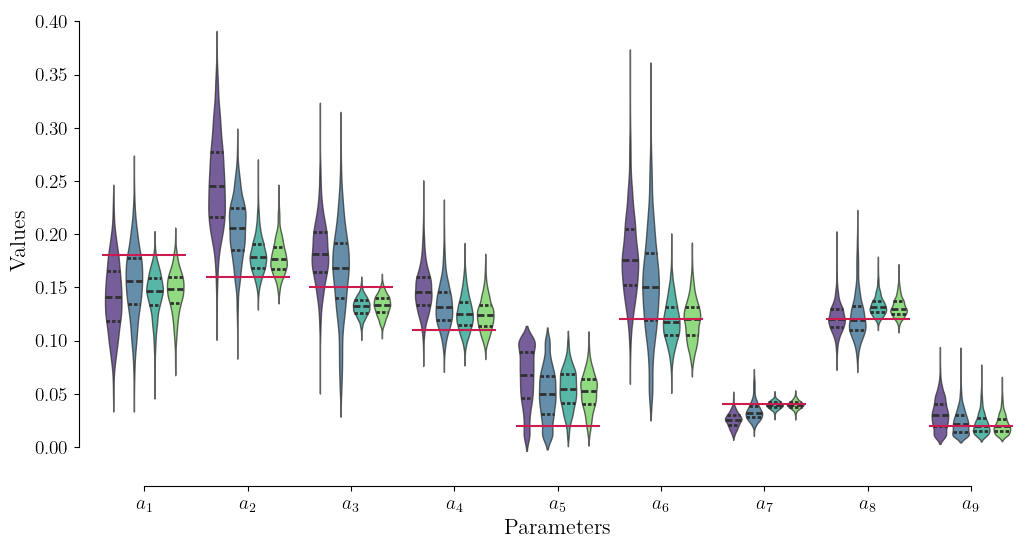

In [182]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,6), facecolor='white')

colors = [palette[0], palette[2], palette[4], palette[6]]

axs = sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1.0, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=60, markeredgewidth=1.5)

sns.despine(offset=10, trim=True);

plt.legend([],[], frameon=False)

# plt.savefig("cycleLV_boots.svg", transparent=True)

plt.show()

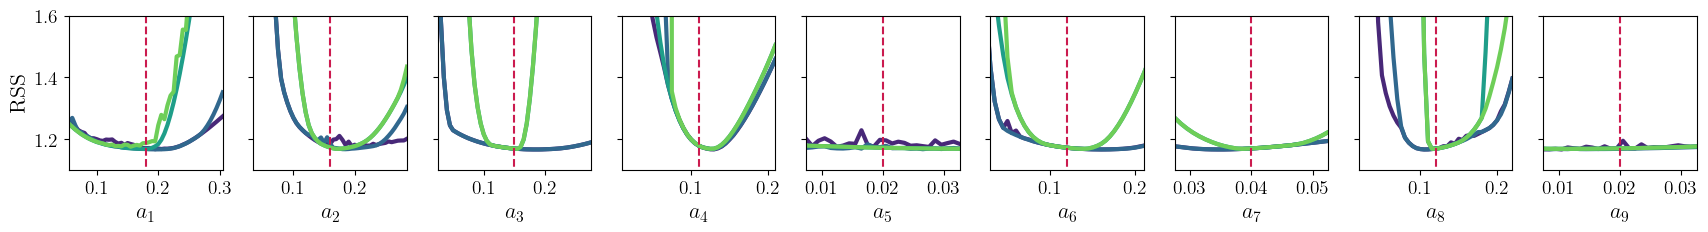

In [183]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(21,2), sharey=True, facecolor='white')

N = 85

axs[0].plot(df_a1_quant['$a_1$'], N*df_a1_quant['RMSE']**2, lw=3, color=palette[0])
axs[0].plot(df_a1_x2['$a_1$'], N*df_a1_x2['RMSE']**2, lw=3, color=palette[2])
axs[0].plot(df_a1_x3['$a_1$'], N*df_a1_x3['RMSE']**2, lw=3, color=palette[4])
axs[0].plot(df_a1_x2x3['$a_1$'], N*df_a1_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[0].vlines(dfGroundPars['$a_1$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[0].set_xlabel('$a_1$')
axs[0].set_ylabel('RSS')
axs[0].set_xlim((0.055,0.305))

axs[1].plot(df_a2_quant['$a_2$'], N*df_a2_quant['RMSE']**2, lw=3, color=palette[0])
axs[1].plot(df_a2_x2['$a_2$'], N*df_a2_x2['RMSE']**2, lw=3, color=palette[2])
axs[1].plot(df_a2_x3['$a_2$'], N*df_a2_x3['RMSE']**2, lw=3, color=palette[4])
axs[1].plot(df_a2_x2x3['$a_2$'], N*df_a2_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[1].vlines(dfGroundPars['$a_2$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[1].set_xlabel('$a_2$')
axs[1].set_xlim((0.035,0.285))

axs[2].plot(df_a3_quant['$a_3$'], N*df_a3_quant['RMSE']**2, lw=3, color=palette[0])
axs[2].plot(df_a3_x2['$a_3$'], N*df_a3_x2['RMSE']**2, lw=3, color=palette[2])
axs[2].plot(df_a3_x3['$a_3$'], N*df_a3_x3['RMSE']**2, lw=3, color=palette[4])
axs[2].plot(df_a3_x2x3['$a_3$'], N*df_a3_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[2].vlines(dfGroundPars['$a_3$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[2].set_xlabel('$a_3$')
axs[2].set_xlim((0.025,0.275))

axs[3].plot(df_a4_quant['$a_4$'], N*df_a4_quant['RMSE']**2, lw=3, color=palette[0])
axs[3].plot(df_a4_x2['$a_4$'], N*df_a4_x2['RMSE']**2, lw=3, color=palette[2])
axs[3].plot(df_a4_x3['$a_4$'], N*df_a4_x3['RMSE']**2, lw=3, color=palette[4])
axs[3].plot(df_a4_x2x3['$a_4$'], N*df_a4_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[3].vlines(dfGroundPars['$a_4$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[3].set_xlabel('$a_4$')
axs[3].set_xlim((0.01,0.210))

axs[4].plot(df_a5_quant['$a_5$'], N*df_a5_quant['RMSE']**2, lw=3, color=palette[0])
axs[4].plot(df_a5_x2['$a_5$'], N*df_a5_x2['RMSE']**2, lw=3, color=palette[2])
axs[4].plot(df_a5_x3['$a_5$'], N*df_a5_x3['RMSE']**2, lw=3, color=palette[4])
axs[4].plot(df_a5_x2x3['$a_5$'], N*df_a5_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[4].vlines(dfGroundPars['$a_5$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[4].set_xlabel('$a_5$')
axs[4].set_xlim((0.0075,0.0325))

axs[5].plot(df_a6_quant['$a_6$'], N*df_a6_quant['RMSE']**2, lw=3, color=palette[0])
axs[5].plot(df_a6_x2['$a_6$'], N*df_a6_x2['RMSE']**2, lw=3, color=palette[2])
axs[5].plot(df_a6_x3['$a_6$'], N*df_a6_x3['RMSE']**2, lw=3, color=palette[4])
axs[5].plot(df_a6_x2x3['$a_6$'], N*df_a6_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[5].vlines(dfGroundPars['$a_6$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[5].set_xlabel('$a_6$')
# axs[5].set_xlim((0.02,0.220))
axs[5].set_xlim((0.03, 0.21))

axs[6].plot(df_a7_quant['$a_7$'], N*df_a7_quant['RMSE']**2, lw=3, color=palette[0])
axs[6].plot(df_a7_x2['$a_7$'], N*df_a7_x2['RMSE']**2, lw=3, color=palette[2])
axs[6].plot(df_a7_x3['$a_7$'], N*df_a7_x3['RMSE']**2, lw=3, color=palette[4])
axs[6].plot(df_a7_x2x3['$a_7$'], N*df_a7_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[6].vlines(dfGroundPars['$a_7$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[6].set_xlabel('$a_7$')
axs[6].set_xlim((0.0275,0.0525))

axs[7].plot(df_a8_quant['$a_8$'], N*df_a8_quant['RMSE']**2, lw=3, color=palette[0])
axs[7].plot(df_a8_x2['$a_8$'], N*df_a8_x2['RMSE']**2, lw=3, color=palette[2])
axs[7].plot(df_a8_x3['$a_8$'], N*df_a8_x3['RMSE']**2, lw=3, color=palette[4])
axs[7].plot(df_a8_x2x3['$a_8$'], N*df_a8_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[7].vlines(dfGroundPars['$a_8$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[7].set_xlabel('$a_8$')
axs[7].set_xlim((0.02,0.220))

axs[8].plot(df_a9_quant['$a_9$'], N*df_a9_quant['RMSE']**2, lw=3, color=palette[0])
axs[8].plot(df_a9_x2['$a_9$'], N*df_a9_x2['RMSE']**2, lw=3, color=palette[2])
axs[8].plot(df_a9_x3['$a_9$'], N*df_a9_x3['RMSE']**2, lw=3, color=palette[4])
axs[8].plot(df_a9_x2x3['$a_9$'], N*df_a9_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[8].vlines(dfGroundPars['$a_9$'], ymin=0.0, ymax=1.7, colors=palette_2[1], linestyles='dashed')
axs[8].set_xlabel('$a_9$')
axs[8].set_xlim((0.0075,0.0325))

# plt.setp(axs, ylim=(N*0.11,N*0.25))
plt.setp(axs, ylim=(1.1,1.6))

# plt.savefig("cycleLV_like.svg", transparent=True)

plt.show()

## Selected graphs

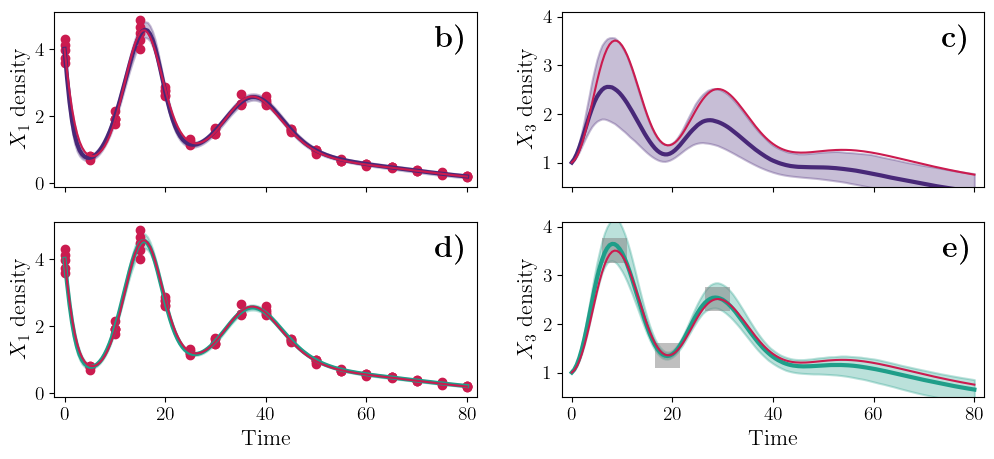

In [102]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,5), sharex=True)

# # for i in range(dfParams.shape[0]):
# for i in range(100):
#     axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
#     axs[0,1].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# # for i in range(dfParams.shape[0]):
# for i in range(100):
#     axs[1,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
#     axs[1,1].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

axs[0,0].plot(t, median_X1_I, lw=3, color=palette[0])
axs[0,0].fill_between(t, confidence_X1_I[0], confidence_X1_I[1], color=palette[0], alpha=0.3, lw=1.5)

axs[0,1].plot(t, median_X3_I, lw=3, color=palette[0])
axs[0,1].fill_between(t, confidence_X3_I[0], confidence_X3_I[1], color=palette[0], alpha=0.3, lw=1.5)

axs[1,0].plot(t, median_X1_III, lw=3, color=palette[4])
axs[1,0].fill_between(t, confidence_X1_III[0], confidence_X1_III[1], color=palette[4], alpha=0.3, lw=1.5)

axs[1,1].plot(t, median_X3_III, lw=3, color=palette[4])
axs[1,1].fill_between(t, confidence_X3_III[0], confidence_X3_III[1], color=palette[4], alpha=0.3, lw=1.5)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")

timeWindow = 5
valueWindow = 0.5
    
for i in range(len(dfQual_x3['Time'])):
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray', alpha=0.5)
    axs[1,1].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[0,1].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[1,1].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_3$ density')

axs[1,0].set_xlabel('Time')
axs[1,1].set_xlabel('Time')

axs[0,0].text(0.9, 0.93, r'\textbf{b)}', transform=axs[0,0].transAxes, fontsize=22, va='top', ha='left')
axs[0,1].text(0.9, 0.93, r'\textbf{c)}', transform=axs[0,1].transAxes, fontsize=22, va='top', ha='left')
axs[1,0].text(0.9, 0.93, r'\textbf{d)}', transform=axs[1,0].transAxes, fontsize=22, va='top', ha='left')
axs[1,1].text(0.9, 0.93, r'\textbf{e)}', transform=axs[1,1].transAxes, fontsize=22, va='top', ha='left')

for i in range(2):
    axs[i,0].set_ylim((-0.1,5.1))
    axs[i,1].set_ylim((0.5,4.1))

plt.setp(axs, xlim=(-2,82))

# plt.savefig("cycleLV_graphs_sel.svg", transparent=True)

plt.show()

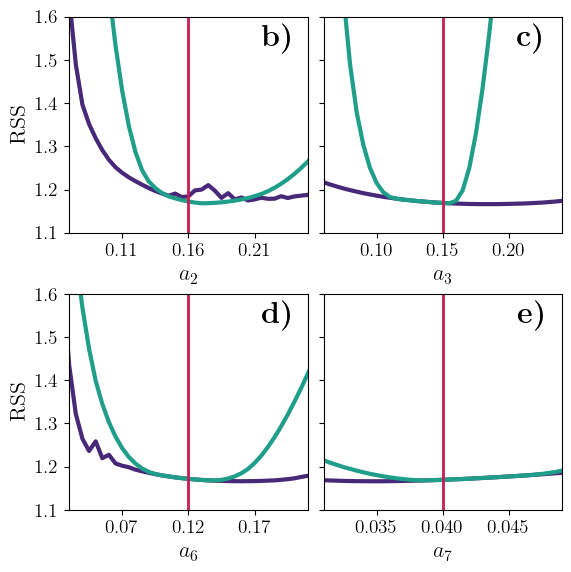

In [103]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,6), sharey=True)

N = 85

axs[0,0].plot(df_a2_quant['$a_2$'], N*df_a2_quant['RMSE']**2, lw=3, color=palette[0])
axs[0,0].plot(df_a2_x3['$a_2$'], N*df_a2_x3['RMSE']**2, lw=3, color=palette[4])
axs[0,0].vlines(dfGroundPars['$a_2$'], ymin=1.0, ymax=2.0, colors=palette_2[1], lw=2)
axs[0,0].set_xlabel('$a_2$')
axs[0,0].set_xlim((0.07, 0.25))
axs[0,0].set_xticks([0.11, 0.16, 0.21])
# axs[0,0].set_ylim((1.1, 1.6))

axs[0,1].plot(df_a3_quant['$a_3$'], N*df_a3_quant['RMSE']**2, lw=3, color=palette[0])
axs[0,1].plot(df_a3_x3['$a_3$'], N*df_a3_x3['RMSE']**2, lw=3, color=palette[4])
axs[0,1].vlines(dfGroundPars['$a_3$'], ymin=1.0, ymax=2.0, colors=palette_2[1], lw=2)
axs[0,1].set_xlabel('$a_3$')
axs[0,1].set_xlim((0.06, 0.24))
axs[0,1].set_xticks([0.10, 0.15, 0.20])
# axs[0,1].set_ylim((1.1, 1.6))

axs[1,0].plot(df_a6_quant['$a_6$'], N*df_a6_quant['RMSE']**2, lw=3, color=palette[0])
axs[1,0].plot(df_a6_x3['$a_6$'], N*df_a6_x3['RMSE']**2, lw=3, color=palette[4])
axs[1,0].vlines(dfGroundPars['$a_6$'], ymin=1.0, ymax=2.0, colors=palette_2[1], lw=2)
axs[1,0].set_xlabel('$a_6$')
axs[1,0].set_xlim((0.03, 0.21))
axs[1,0].set_xticks([0.07, 0.12, 0.17])
# axs[1,0].set_ylim((1.1, 1.6))

axs[1,1].plot(df_a7_quant['$a_7$'], N*df_a7_quant['RMSE']**2, lw=3, color=palette[0])
axs[1,1].plot(df_a7_x3['$a_7$'], N*df_a7_x3['RMSE']**2, lw=3, color=palette[4])
axs[1,1].vlines(dfGroundPars['$a_7$'], ymin=1.0, ymax=2.0, colors=palette_2[1], lw=2)
axs[1,1].set_xlabel('$a_7$')
axs[1,1].set_xlim((0.031, 0.049))
axs[1,1].set_xticks([0.035, 0.040, 0.045])
# axs[1,1].set_ylim((1.1, 1.6))

for i in range(2):
    axs[i,0].set_ylabel('RSS')

axs[0,0].text(0.81, 0.97, r'\textbf{b)}', transform=axs[0,0].transAxes, fontsize=22, va='top', ha='left')
axs[0,1].text(0.81, 0.97, r'\textbf{c)}', transform=axs[0,1].transAxes, fontsize=22, va='top', ha='left')
axs[1,0].text(0.81, 0.97, r'\textbf{d)}', transform=axs[1,0].transAxes, fontsize=22, va='top', ha='left')
axs[1,1].text(0.81, 0.97, r'\textbf{e)}', transform=axs[1,1].transAxes, fontsize=22, va='top', ha='left')

plt.setp(axs, ylim=(1.1, 1.6))

# for i in range(2):
#     for j in range(2):
#         axs[i,j].set_yticks(np.arange(1.2, 1.5, step=0.1))

plt.tight_layout(w_pad=0.5, h_pad=0.1)

# fig.delaxes(axs[1,1])

# plt.savefig("cycleLV_like_sel.svg", transparent=True)

plt.show()

In [104]:
mask = ~dfParams_all['Strategy'].isin(['II', 'IV'])
mask &= ~dfParams_all['Parameters'].isin(['$a_1$', '$a_4$', '$a_5$', '$a_8$', '$a_9$'])
# mask &= ~dfParams_all['Parameters'].isin(['$a_1$', '$a_4$', '$a_5$', '$a_7$', '$a_8$', '$a_9$'])
dfParamSel = dfParams_all[mask].copy()

mask = ~dfParams_ground['Parameters'].isin(['$a_1$', '$a_4$', '$a_5$', '$a_8$', '$a_9$'])
# mask = ~dfParams_ground['Parameters'].isin(['$a_1$', '$a_4$', '$a_5$', '$a_7$', '$a_8$', '$a_9$'])
dfGroundSel = dfParams_ground[mask].copy()

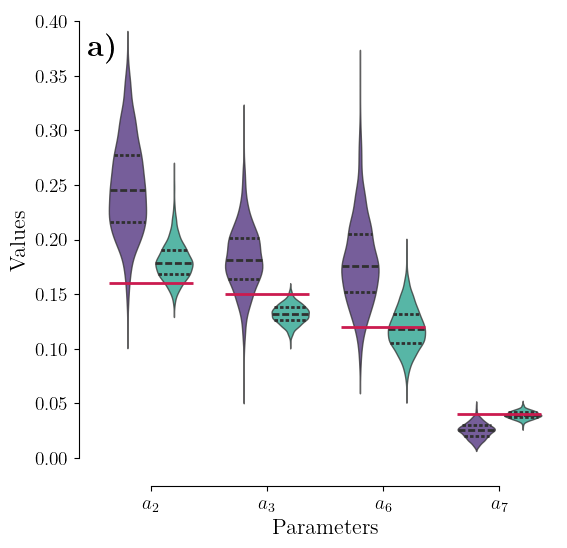

In [105]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6), facecolor='white')

colors = [palette[0], palette[4]]

axs = sns.violinplot(data=dfParamSel, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1.0, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfGroundSel, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=60, markeredgewidth=2)

axs.text(-0.01, 0.95, r'\textbf{a)}', transform=axs.transAxes, fontsize=22, va='top', ha='left')
plt.legend([],[], frameon=False)

# axs.set_ylim((0.05,0.45))
sns.despine(offset=10, trim=True);

# plt.savefig("cycleLV_boots_sel.svg", transparent=True)

plt.show()

# Lotka-Volterra (Linear model)

\begin{align}
\dot X_1 &= a_0 X_1 - a_2 X_1 X_2 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 - a_6 X_2 X_3 \\
\dot X_3 &= a_8 X_2 X_3 - a_9 X_3 \\
\end{align}

In [7]:
a0 = 0.14 # Reproduction rate of X1
a1 = 0.0 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.0 # Reproduction rate of X1 in presence of X3
a4 = 0.15 # Reproduction rate of X2 in presence of X1
a5 = 0.11 # Mortality rate of X2
a6 = 0.05 # Rate of predation of X3 on X2
a7 = 0.0 # Rate of predation of X1 on X3
a8 = 0.06 # Reproduction rate of X3 in presence of X2
a9 = 0.05 # Mortality rate of X3

In [8]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = parNames[:-1]

In [9]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.14,0.0,0.16,0.0,0.15,0.11,0.05,0.0,0.06,0.05


## Generating data

In [10]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [11]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [12]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [13]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

## Recovering parameters

In [14]:
dfParams_ground = dfGroundPars.drop(columns=['$a_1$', '$a_3$', '$a_7$']).melt(var_name='Parameters', value_name='Values')

In [15]:
dfData = pd.read_csv('linear/LVdata_noise.data', sep=' ')

### Quantitative X1

In [16]:
dfParams = pd.read_csv('linear/bestPars_quant.dat', sep=' ', names=parNames)

In [17]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [18]:
dfParams_quant = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [19]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [20]:
df_a0_quant = df_a0
df_a2_quant = df_a2
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a6_quant = df_a6
df_a8_quant = df_a8
df_a9_quant = df_a9

### Qualitative X2

In [21]:
dfQual_x2 = pd.read_csv('linear/LVdata_qual_x2.data', sep=' ')

In [22]:
dfParams = pd.read_csv('linear/bestPars_x2.dat', sep=' ', names=parNames)

In [23]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [24]:
dfParams_x2 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [25]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x2.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x2.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x2.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [26]:
df_a0_x2 = df_a0
df_a2_x2 = df_a2
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a6_x2 = df_a6
df_a8_x2 = df_a8
df_a9_x2 = df_a9

### Qualitative X3

In [27]:
dfQual_x3 = pd.read_csv('linear/LVdata_qual_x3.data', sep=' ')

In [28]:
dfParams = pd.read_csv('linear/bestPars_x3.dat', sep=' ', names=parNames)

In [29]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [30]:
dfParams_x3 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [31]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [32]:
df_a0_x3 = df_a0
df_a2_x3 = df_a2
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a6_x3 = df_a6
df_a8_x3 = df_a8
df_a9_x3 = df_a9

### Qualitative X2 and X3

In [33]:
dfParams = pd.read_csv('linear/bestPars_x2x3.dat', sep=' ', names=parNames)

In [34]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [35]:
dfParams_x2x3 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [36]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [37]:
df_a0_x2x3 = df_a0
df_a2_x2x3 = df_a2
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a6_x2x3 = df_a6
df_a8_x2x3 = df_a8
df_a9_x2x3 = df_a9

## Comparative

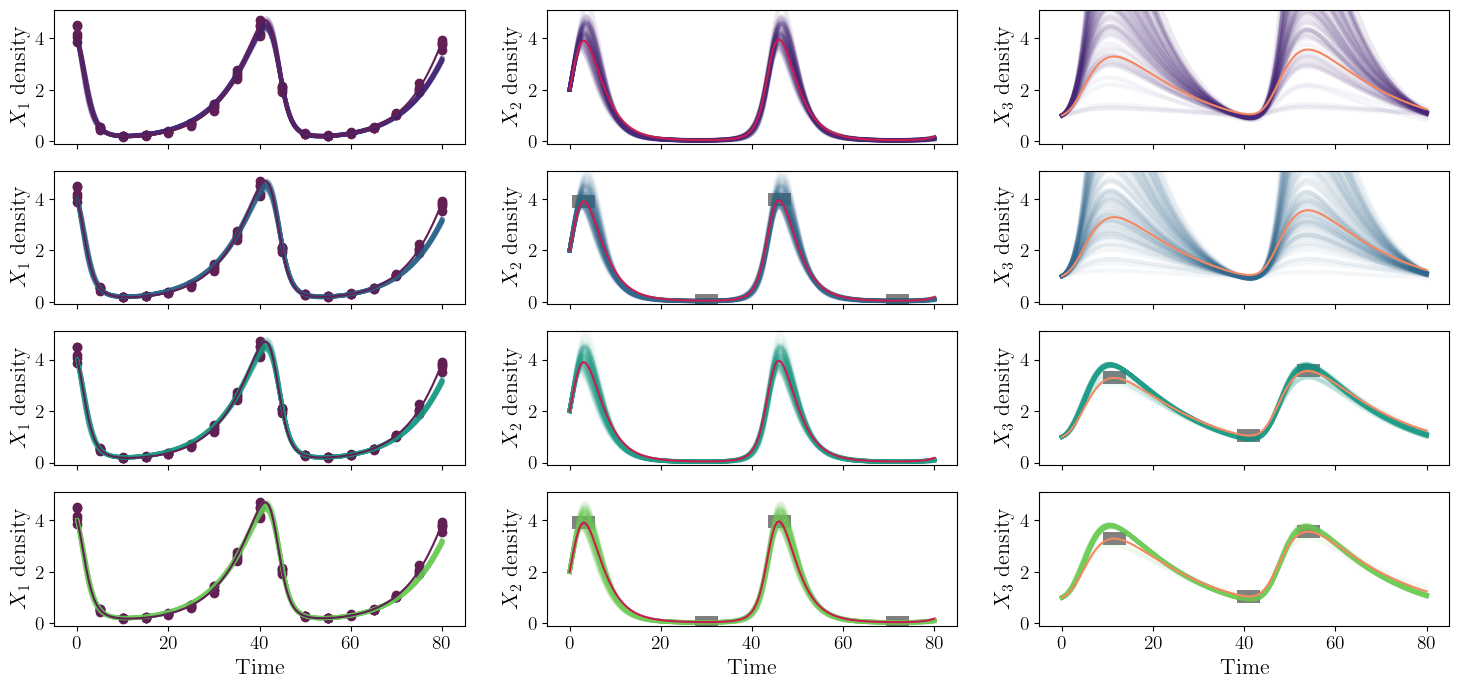

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,8), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

plt.setp(axs, xlim=(-5,85), ylim=(-0.1,5.1))

# plt.savefig("linearLV_graphs.svg", transparent=True)

plt.show()

In [39]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [40]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])
dfParams_all_linear = dfParams_all.copy()

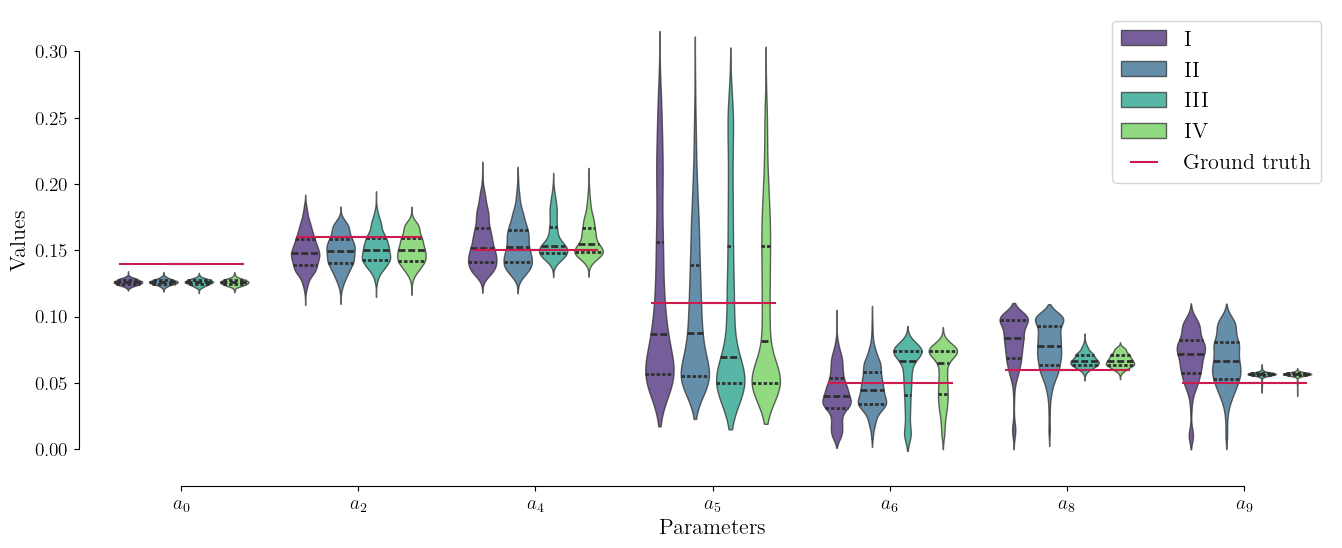

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6))

colors = [palette[0], palette[2], palette[4], palette[6]]

sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=20, markeredgewidth=1.5)

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=90, markeredgewidth=1.5)

sns.despine(offset=10, trim=True);

# plt.savefig("linearLV_boots.svg", transparent=True)

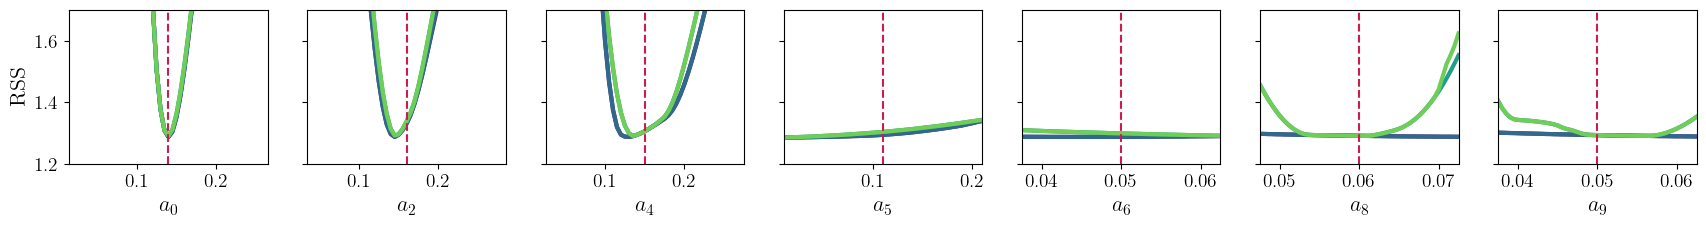

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(21,2), sharey=True, facecolor='white')

N = 85
ymin = 1.2
ymax = 1.7

axs[0].plot(df_a0_quant['$a_0$'], N*df_a0_quant['RMSE']**2, lw=3, color=palette[0])
axs[0].plot(df_a0_x2['$a_0$'], N*df_a0_x2['RMSE']**2, lw=3, color=palette[2])
axs[0].plot(df_a0_x3['$a_0$'], N*df_a0_x3['RMSE']**2, lw=3, color=palette[4])
axs[0].plot(df_a0_x2x3['$a_0$'], N*df_a0_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[0].vlines(dfGroundPars['$a_0$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[0].set_xlabel('$a_0$')
# axs[0].set_ylabel('RMSE')
axs[0].set_ylabel('RSS')
axs[0].set_xlim((0.015,0.265))

axs[1].plot(df_a2_quant['$a_2$'], N*df_a2_quant['RMSE']**2, lw=3, color=palette[0])
axs[1].plot(df_a2_x2['$a_2$'], N*df_a2_x2['RMSE']**2, lw=3, color=palette[2])
axs[1].plot(df_a2_x3['$a_2$'], N*df_a2_x3['RMSE']**2, lw=3, color=palette[4])
axs[1].plot(df_a2_x2x3['$a_2$'], N*df_a2_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[1].vlines(dfGroundPars['$a_2$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[1].set_xlabel('$a_2$')
axs[1].set_xlim((0.035,0.285))

axs[2].plot(df_a4_quant['$a_4$'], N*df_a4_quant['RMSE']**2, lw=3, color=palette[0])
axs[2].plot(df_a4_x2['$a_4$'], N*df_a4_x2['RMSE']**2, lw=3, color=palette[2])
axs[2].plot(df_a4_x3['$a_4$'], N*df_a4_x3['RMSE']**2, lw=3, color=palette[4])
axs[2].plot(df_a4_x2x3['$a_4$'], N*df_a4_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[2].vlines(dfGroundPars['$a_4$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[2].set_xlabel('$a_4$')
axs[2].set_xlim((0.025,0.275))

axs[3].plot(df_a5_quant['$a_5$'], N*df_a5_quant['RMSE']**2, lw=3, color=palette[0])
axs[3].plot(df_a5_x2['$a_5$'], N*df_a5_x2['RMSE']**2, lw=3, color=palette[2])
axs[3].plot(df_a5_x3['$a_5$'], N*df_a5_x3['RMSE']**2, lw=3, color=palette[4])
axs[3].plot(df_a5_x2x3['$a_5$'], N*df_a5_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[3].vlines(dfGroundPars['$a_5$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[3].set_xlabel('$a_5$')
axs[3].set_xlim((0.010,0.210))

axs[4].plot(df_a6_quant['$a_6$'], N*df_a6_quant['RMSE']**2, lw=3, color=palette[0])
axs[4].plot(df_a6_x2['$a_6$'], N*df_a6_x2['RMSE']**2, lw=3, color=palette[2])
axs[4].plot(df_a6_x3['$a_6$'], N*df_a6_x3['RMSE']**2, lw=3, color=palette[4])
axs[4].plot(df_a6_x2x3['$a_6$'], N*df_a6_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[4].vlines(dfGroundPars['$a_6$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[4].set_xlabel('$a_6$')
axs[4].set_xlim((0.0375,0.0625))

axs[5].plot(df_a8_quant['$a_8$'], N*df_a8_quant['RMSE']**2, lw=3, color=palette[0])
axs[5].plot(df_a8_x2['$a_8$'], N*df_a8_x2['RMSE']**2, lw=3, color=palette[2])
axs[5].plot(df_a8_x3['$a_8$'], N*df_a8_x3['RMSE']**2, lw=3, color=palette[4])
axs[5].plot(df_a8_x2x3['$a_8$'], N*df_a8_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[5].vlines(dfGroundPars['$a_8$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[5].set_xlabel('$a_8$')
axs[5].set_xlim((0.0475,0.0725))

axs[6].plot(df_a9_quant['$a_9$'], N*df_a9_quant['RMSE']**2, lw=3, color=palette[0])
axs[6].plot(df_a9_x2['$a_9$'], N*df_a9_x2['RMSE']**2, lw=3, color=palette[2])
axs[6].plot(df_a9_x3['$a_9$'], N*df_a9_x3['RMSE']**2, lw=3, color=palette[4])
axs[6].plot(df_a9_x2x3['$a_9$'], N*df_a9_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[6].vlines(dfGroundPars['$a_9$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[6].set_xlabel('$a_9$')
axs[6].set_xlim((0.0375,0.0625))

# plt.setp(axs, ylim=(0.12,0.15))
# plt.setp(axs, ylim=(0.12*N, 0.15*N))
plt.setp(axs, ylim=(ymin, ymax))

# plt.savefig("linearLV_like.svg", transparent=True)

plt.show()

# Lotka-Volterra (2-predators model)

\begin{align}
\dot X_1 &= a_0 X_1 - a_2 X_1 X_2 - a_3 X_1 X_3 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 \\
\dot X_3 &= a_7 X_1 X_3 - a_9 X_3 \\
\end{align}

In [106]:
a0 = 0.45 # Reproduction rate of X1
a1 = 0.0 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = -0.15 # Reproduction rate of X1 in presence of X3
a4 = 0.15 # Reproduction rate of X2 in presence of X1
a5 = 0.11 # Mortality rate of X2
a6 = 0.0 # Rate of predation of X3 on X2
a7 = -0.08 # Rate of predation of X1 on X3
a8 = 0.0 # Reproduction rate of X3 in presence of X2
a9 = 0.05 # Mortality rate of X3

In [107]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = parNames[:-1]

In [108]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.45,0.0,0.16,-0.15,0.15,0.11,0.0,-0.08,0.0,0.05


## Generating data

In [109]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [110]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [111]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [112]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

## Recovering parameters

In [113]:
dfParams_ground = dfGroundPars.drop(columns=['$a_1$', '$a_6$', '$a_8$']).melt(var_name='Parameters', value_name='Values')

In [114]:
dfData = pd.read_csv('2-predators/LVdata_noise.data', sep=' ')

### Quantitative X1

In [115]:
dfParams = pd.read_csv('2-predators/bestPars_quant.dat', sep=' ', names=parNames)

In [116]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [117]:
dfParams_quant = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [118]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [119]:
df_a0_quant = df_a0
df_a2_quant = df_a2
df_a3_quant = df_a3
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a7_quant = df_a7
df_a9_quant = df_a9

### Qualitative X2

In [120]:
dfQual_x2 = pd.read_csv('2-predators/LVdata_qual_x2.data', sep=' ')

In [121]:
dfParams = pd.read_csv('2-predators/bestPars_x2.dat', sep=' ', names=parNames)

In [122]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [123]:
dfParams_x2 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [124]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x2.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x2.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x2.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [125]:
df_a0_x2 = df_a0
df_a2_x2 = df_a2
df_a3_x2 = df_a3
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a7_x2 = df_a7
df_a9_x2 = df_a9

### Qualitative X3

In [126]:
dfQual_x3 = pd.read_csv('2-predators/LVdata_qual_x3.data', sep=' ')

In [127]:
dfParams = pd.read_csv('2-predators/bestPars_x3.dat', sep=' ', names=parNames)

In [128]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [129]:
dfParams_x3 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [130]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [131]:
df_a0_x3 = df_a0
df_a2_x3 = df_a2
df_a3_x3 = df_a3
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a7_x3 = df_a7
df_a9_x3 = df_a9

### Qualitative X2 and X3

In [132]:
dfParams = pd.read_csv('2-predators/bestPars_x2x3.dat', sep=' ', names=parNames)

In [133]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [134]:
dfParams_x2x3 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

#### Likelihood profiles

In [135]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [136]:
df_a0_x2x3 = df_a0
df_a2_x2x3 = df_a2
df_a3_x2x3 = df_a3
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a7_x2x3 = df_a7
df_a9_x2x3 = df_a9

## Comparative

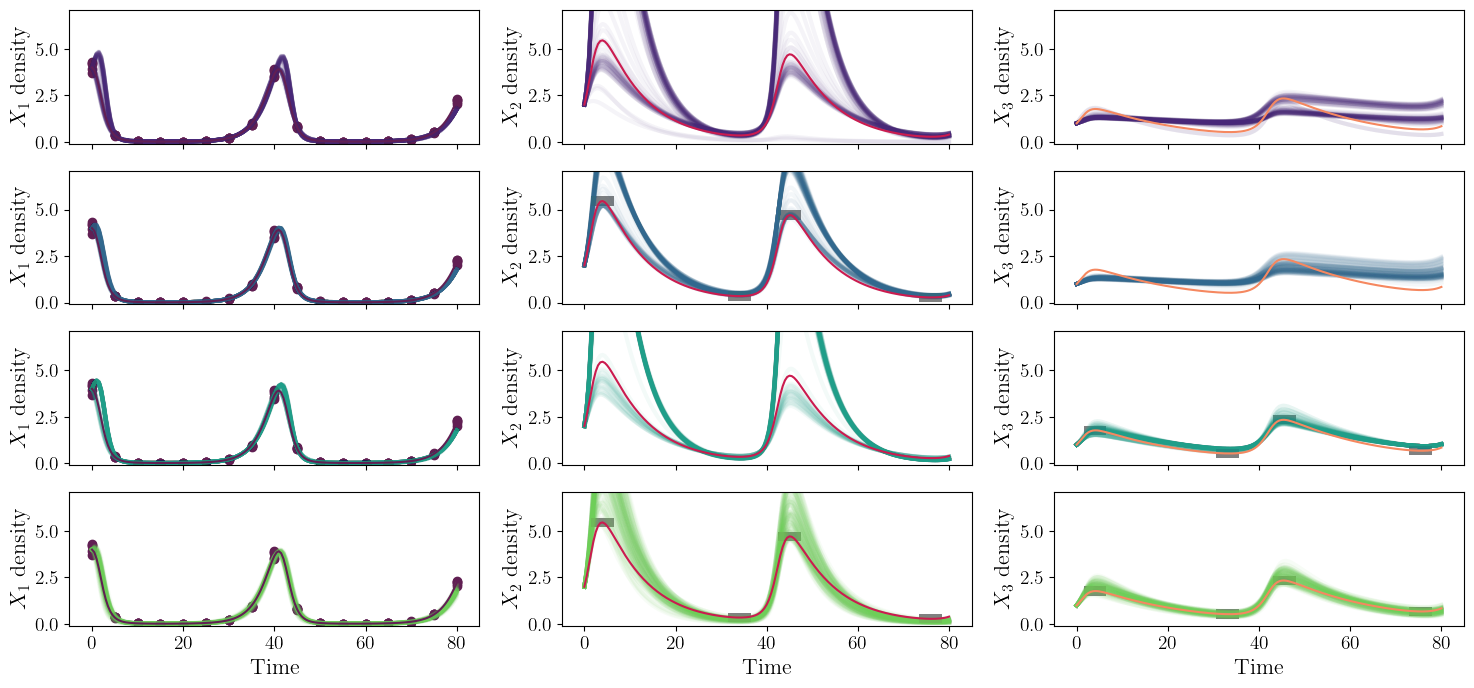

In [137]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,8), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

plt.setp(axs, xlim=(-5,85), ylim=(-0.1,7.1))

# plt.savefig("2predLV_graphs.svg", transparent=True)

plt.show()

In [138]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [139]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])

In [140]:
dfParams_all['Values'] = abs(dfParams_all['Values'])
dfParams_ground['Values'] = abs(dfParams_ground['Values'])

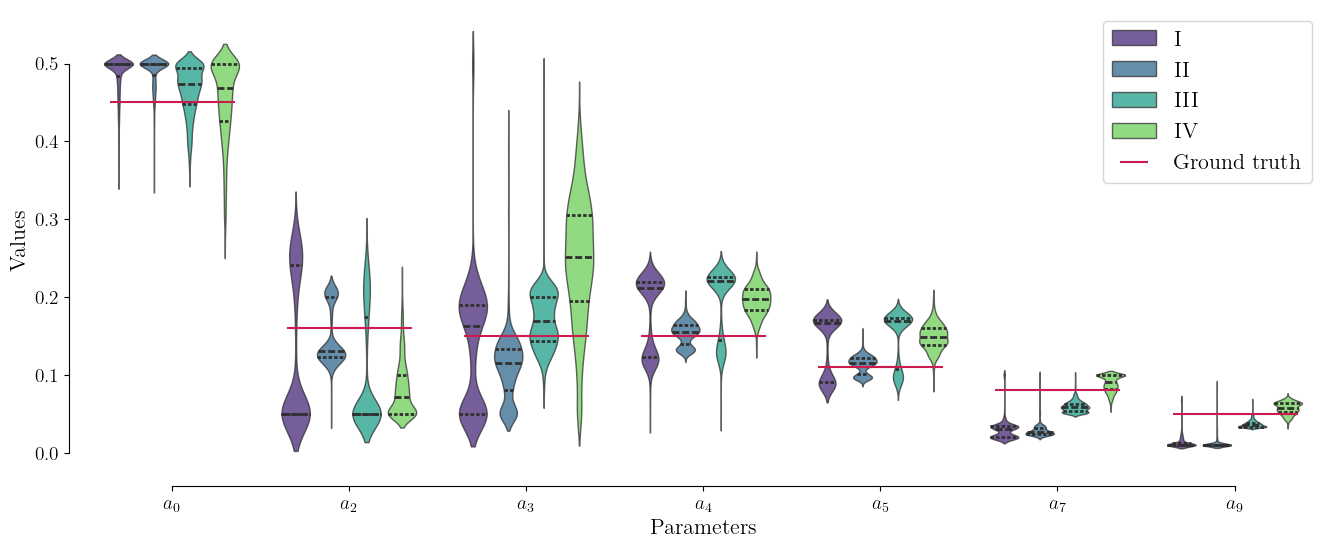

In [141]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6))

colors = [palette[0], palette[2], palette[4], palette[6]]

sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=20, markeredgewidth=1.5)

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=90, markeredgewidth=1.5)

sns.despine(offset=10, trim=True);

# plt.savefig("2predLV_boots.svg", transparent=True)

plt.show()

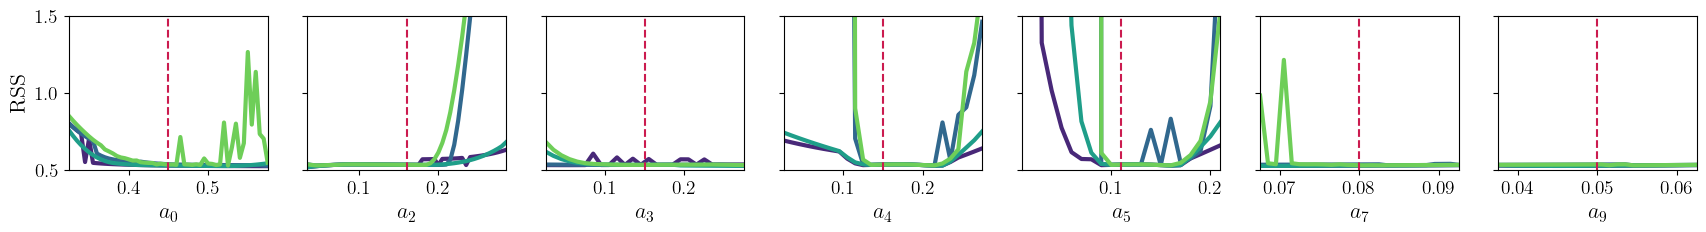

In [143]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(21,2), sharey=True, facecolor='white')

N = 85
ymin = 0.5
ymax = 1.5

axs[0].plot(df_a0_quant['$a_0$'], N*df_a0_quant['RMSE']**2, lw=3, color=palette[0])
axs[0].plot(df_a0_x2['$a_0$'], N*df_a0_x2['RMSE']**2, lw=3, color=palette[2])
axs[0].plot(df_a0_x3['$a_0$'], N*df_a0_x3['RMSE']**2, lw=3, color=palette[4])
axs[0].plot(df_a0_x2x3['$a_0$'], N*df_a0_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[0].vlines(dfGroundPars['$a_0$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[0].set_xlabel('$a_0$')
axs[0].set_ylabel('RSS')
axs[0].set_xlim((0.325,0.575))

axs[1].plot(df_a2_quant['$a_2$'], N*df_a2_quant['RMSE']**2, lw=3, color=palette[0])
axs[1].plot(df_a2_x2['$a_2$'], N*df_a2_x2['RMSE']**2, lw=3, color=palette[2])
axs[1].plot(df_a2_x3['$a_2$'], N*df_a2_x3['RMSE']**2, lw=3, color=palette[4])
axs[1].plot(df_a2_x2x3['$a_2$'], N*df_a2_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[1].vlines(dfGroundPars['$a_2$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[1].set_xlabel('$a_2$')
axs[1].set_xlim((0.035,0.285))

axs[2].plot(-df_a3_quant['$a_3$'], N*df_a3_quant['RMSE']**2, lw=3, color=palette[0])
axs[2].plot(-df_a3_x2['$a_3$'], N*df_a3_x2['RMSE']**2, lw=3, color=palette[2])
axs[2].plot(-df_a3_x3['$a_3$'], N*df_a3_x3['RMSE']**2, lw=3, color=palette[4])
axs[2].plot(-df_a3_x2x3['$a_3$'], N*df_a3_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[2].vlines(-dfGroundPars['$a_3$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[2].set_xlabel('$a_3$')
axs[2].set_xlim((0.025,0.275))

axs[3].plot(df_a4_quant['$a_4$'], N*df_a4_quant['RMSE']**2, lw=3, color=palette[0])
axs[3].plot(df_a4_x2['$a_4$'], N*df_a4_x2['RMSE']**2, lw=3, color=palette[2])
axs[3].plot(df_a4_x3['$a_4$'], N*df_a4_x3['RMSE']**2, lw=3, color=palette[4])
axs[3].plot(df_a4_x2x3['$a_4$'], N*df_a4_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[3].vlines(dfGroundPars['$a_4$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[3].set_xlabel('$a_4$')
axs[3].set_xlim((0.025,0.275))

axs[4].plot(df_a5_quant['$a_5$'], N*df_a5_quant['RMSE']**2, lw=3, color=palette[0])
axs[4].plot(df_a5_x2['$a_5$'], N*df_a5_x2['RMSE']**2, lw=3, color=palette[2])
axs[4].plot(df_a5_x3['$a_5$'], N*df_a5_x3['RMSE']**2, lw=3, color=palette[4])
axs[4].plot(df_a5_x2x3['$a_5$'], N*df_a5_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[4].vlines(dfGroundPars['$a_5$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[4].set_xlabel('$a_5$')
axs[4].set_xlim((0.010,0.210))

axs[5].plot(-df_a7_quant['$a_7$'], N*df_a7_quant['RMSE']**2, lw=3, color=palette[0])
axs[5].plot(-df_a7_x2['$a_7$'], N*df_a7_x2['RMSE']**2, lw=3, color=palette[2])
axs[5].plot(-df_a7_x3['$a_7$'], N*df_a7_x3['RMSE']**2, lw=3, color=palette[4])
axs[5].plot(-df_a7_x2x3['$a_7$'], N*df_a7_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[5].vlines(-dfGroundPars['$a_7$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[5].set_xlabel('$a_7$')
axs[5].set_xlim((0.0675,0.0925))

axs[6].plot(df_a9_quant['$a_9$'], N*df_a9_quant['RMSE']**2, lw=3, color=palette[0])
axs[6].plot(df_a9_x2['$a_9$'], N*df_a9_x2['RMSE']**2, lw=3, color=palette[2])
axs[6].plot(df_a9_x3['$a_9$'], N*df_a9_x3['RMSE']**2, lw=3, color=palette[4])
axs[6].plot(df_a9_x2x3['$a_9$'], N*df_a9_x2x3['RMSE']**2, lw=3, color=palette[6])
axs[6].vlines(dfGroundPars['$a_9$'], ymin=ymin, ymax=ymax, colors=palette_2[1], linestyles='dashed')
axs[6].set_xlabel('$a_9$')
axs[6].set_xlim((0.0375,0.0625))

plt.setp(axs, ylim=(ymin,ymax))
# plt.setp(axs, ylim=(0.5,1.5))

# plt.savefig("2predLV_like.svg", transparent=True)

plt.show()